#### Data science is OSEMI:

    - obtaining data (download, query, extract, or generate)
    - scrubbing (filtering, extracting, replacing, handling missing values, converting formats)
    - exploring (view, derive statistics, create visualizations)
    - modelling (clustering, classification, regression, dimensionality reduction)
    - interpreting (conclusions, evaluations, publishing)
    
Example derived from: Janssens, J. H. M. (2014). Data Science Toolbox. Retrieved May 10, 2014, from [Data Science Toolbox](http://datasciencetoolbox.org).

In [1]:
! echo 'The commandline is awesome' | cowsay

 ____________________________ 
< The commandline is awesome >
 ---------------------------- 
        \   ^__^
         \  (oo)\_______
            (__)\       )\/\
                ||----w |
                ||     ||


Suppose we want to know when actually the "New York Fashion Week" takes place. We download data from the New York Times using their API (for which we registered and in return got a so-called API-KEY). We used the following command, searching for articles mentioning "New York Fashion Week" in the period 2009-2013:

    parallel -j1 --progress --delay 0.1 --results results "curl -sL "\
    > "'http://api.nytimes.com/svc/search/v2/articlesearch.json?q=New+York+'"\
    > "'Fashion+Week&begin_date={1}0101&end_date={1}1231&page={2}&api-key='"\
    > "'<your-api-key>'" ::: {2009..2013} ::: {0..99} > /dev/null

The premiss being here that the majority of articles about the New York Fashion Week would be written when it was going on. This query got us a bunch of articles which we stored in the results subdirectory under the data directory.

In [2]:
# Let's have a look
! tree data/results | head

data/results
└── 1
    ├── 2009
    │   └── 2
    │       ├── 0
    │       │   ├── stderr
    │       │   └── stdout
    │       ├── 1
    │       │   ├── stderr
    │       │   └── stdout


Now that we have some data, let's follow the usual steps.

In [3]:
# Next is an important step, for which we need a cl pipeline containing: cat, jq, json2csv
! cat data/results/1/*/2/*/stdout | jq -c '.response.docs[] | {date: .pub_date, type: .document_type, title: .headline.main}' | json2csv -p -k date,type,title > data/fashion.csv
! wc -l fashion.csv

4850 fashion.csv


In [4]:
! < fashion.csv cols -c date cut -dT -f1 | head | csvlook

paste: write error: Broken pipe
paste: write error
|-------------+------------+-----------------------------------------|
|  date       | type       | title                                   |
|-------------+------------+-----------------------------------------|
|  2009-02-20 | multimedia | Recap: Fall Fashion Week, New York      |
|  2009-02-15 | multimedia | Michael Kors                            |
|  2009-09-17 | multimedia | UrbanEye: Backstage at Marc Jacobs      |
|  2009-02-16 | multimedia | Bill Cunningham on N.Y. Fashion Week    |
|  2009-09-17 | multimedia | Fashion Week Spring 2010                |
|  2009-02-12 | multimedia | Alexander Wang                          |
|  2009-09-11 | multimedia | Of Color | Diversity Beyond the Runway  |
|  2009-09-18 | multimedia | On the Street | The Look                |
|  2009-09-14 | multimedia | A Designer Reinvents Himself            |
|-------------+------------+-----------------------------------------|
cut: write error: Broken p

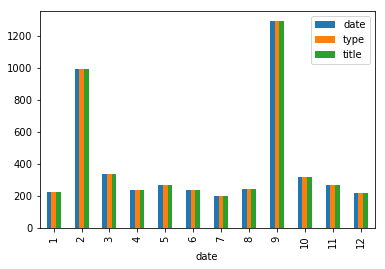

In [5]:
import pandas as pd
%matplotlib inline
df = pd.read_csv("fashion.csv")
df["date"] = df["date"].astype("datetime64[ns]")
df.groupby(df["date"].dt.month).count().plot(kind="bar")

So there we have our answer: Twice a year in February and September. There are simpler ways of getting this answer. We could have consulted the New York Fashion Week website or placed a phone call directly to the fashion editor of the New York Times, or we could have just used a Google search. Things we would have certainly done, if we were journalists or policemen. But in the context of scientific research we don't pick up the phone to get a quote that we can present as the outcome of our research. There we explore things (perhaps in curious ways) and use arguments to present a convincing case of what we have found. In this context, data and ways to manipulate and present data with the help of the computer are important assets.

![New York Fashion Week Google search](nyfw.png)